## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

## Data Collection & Analysis

In [2]:
mart_data = pd.read_csv('Datasets/mart_data.csv')
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
mart_data.shape

(8523, 12)

In [4]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
mart_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Handling missing values

#### 1. Item_weight column

In [8]:
# Mean value of 'Item weight' column
mart_data['Item_Weight'].mean()

12.857645184135976

In [9]:
# filling the missing values in 'item weight' column with the mean
mart_data.Item_Weight.fillna(mart_data['Item_Weight'].mean(), inplace = True)

In [10]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### 2. Outlet_size column

In [11]:
mode_of_outlet_size = mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))

In [12]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

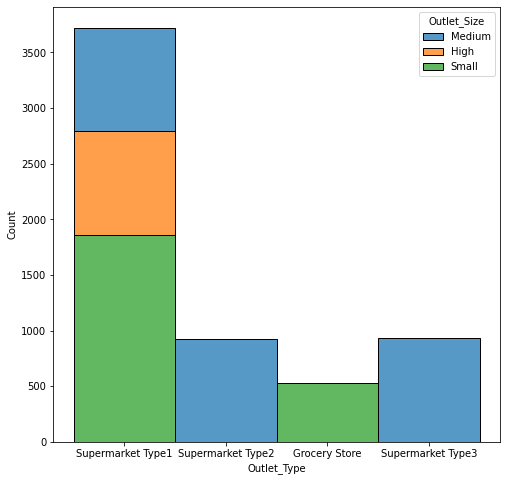

In [13]:
plt.figure(figsize = (8,8))
sns.histplot(x="Outlet_Type", hue="Outlet_Size", data=mart_data, multiple="stack")

In [14]:
missing_values = mart_data['Outlet_Size'].isnull()

In [15]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [16]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

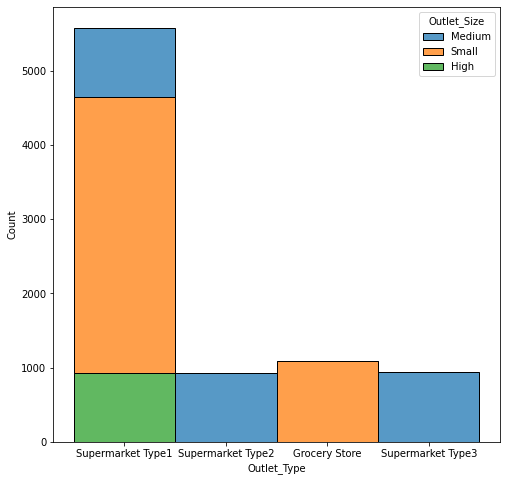

In [17]:
plt.figure(figsize = (8,8))
sns.histplot(x="Outlet_Type", hue="Outlet_Size", data=mart_data, multiple="stack")

In [18]:
mart_data.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [19]:
sns.set()

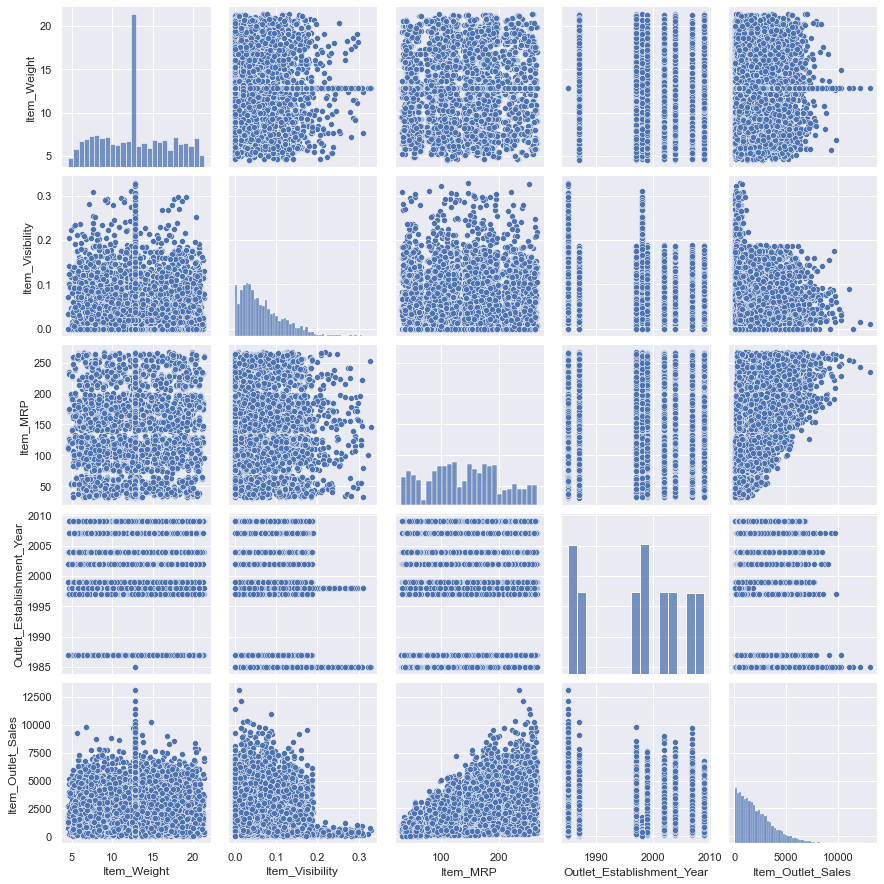

In [20]:
sns.pairplot(mart_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


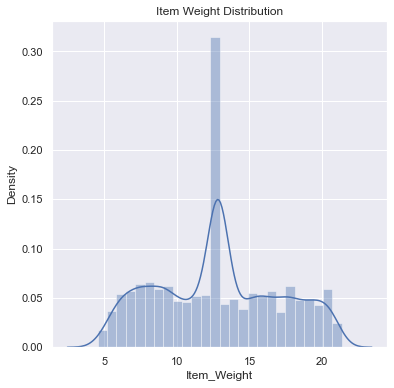

In [21]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


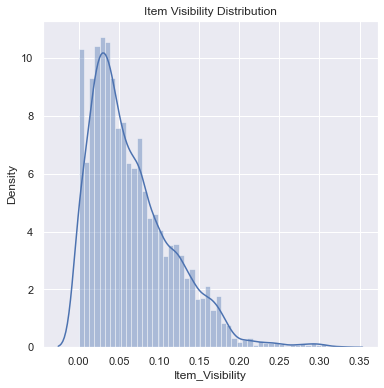

In [22]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.show()

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


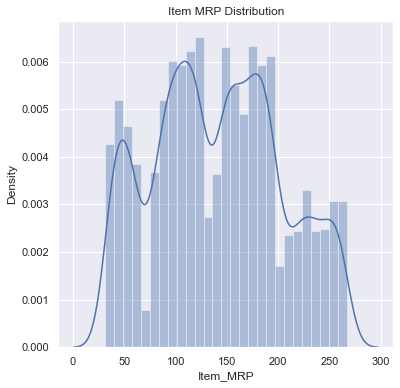

In [23]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_MRP'])
plt.title('Item MRP Distribution')
plt.show()

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


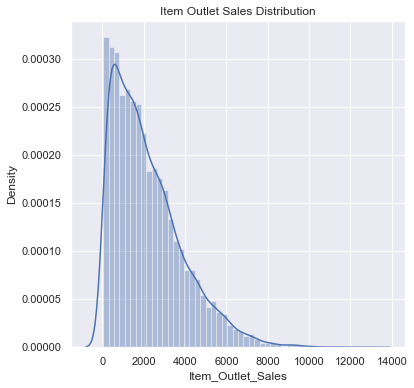

In [24]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

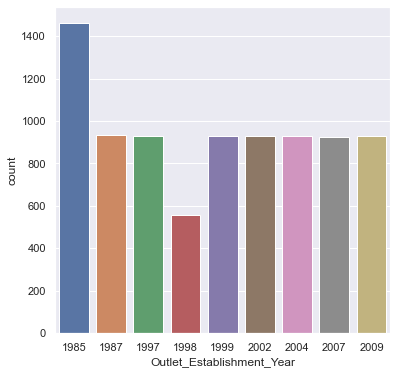

In [25]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = mart_data)
plt.show()

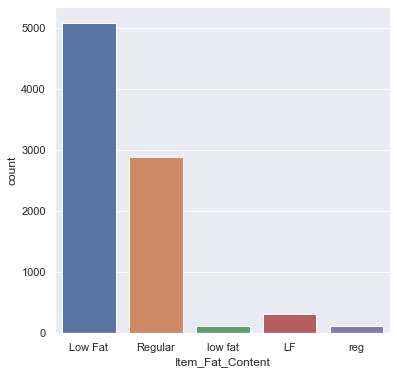

In [26]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = mart_data)
plt.show()

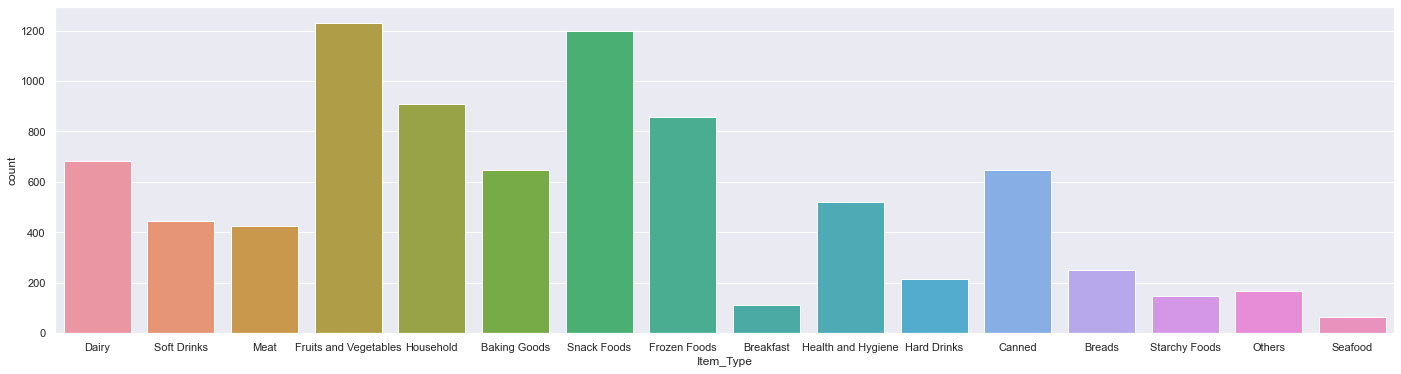

In [27]:
plt.figure(figsize = (24,6))
sns.countplot(x = 'Item_Type', data = mart_data)
plt.show()

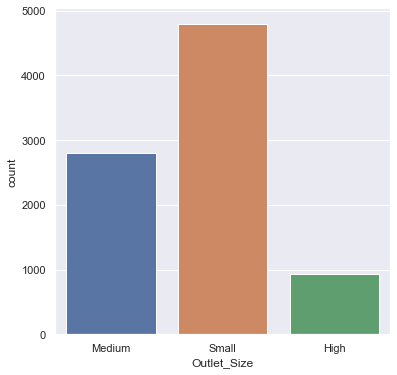

In [28]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', data = mart_data)
plt.show()

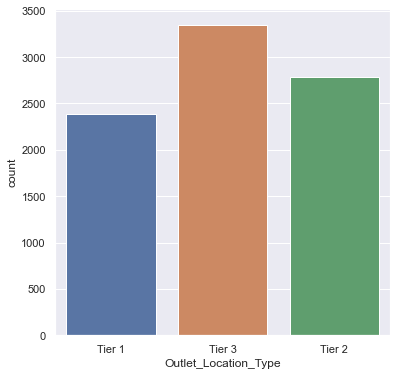

In [29]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Location_Type', data = mart_data)
plt.show()

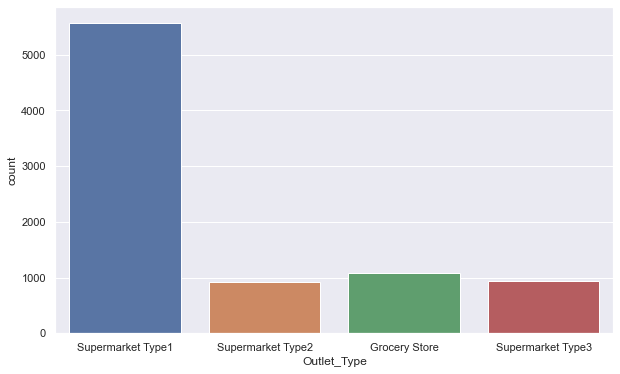

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Outlet_Type', data = mart_data)
plt.show()

## Data Preprocessing

In [31]:
mart_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
mart_data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'}}, inplace = True)
mart_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [33]:
encoder = LabelEncoder()
mart_data.Item_Identifier = encoder.fit_transform(mart_data.Item_Identifier)
mart_data.Item_Fat_Content = encoder.fit_transform(mart_data.Item_Fat_Content)
mart_data.Item_Type = encoder.fit_transform(mart_data.Item_Type)
mart_data.Outlet_Identifier = encoder.fit_transform(mart_data.Outlet_Identifier)
mart_data.Outlet_Size = encoder.fit_transform(mart_data.Outlet_Size)
mart_data.Outlet_Location_Type = encoder.fit_transform(mart_data.Outlet_Location_Type)
mart_data.Item_Identifier = encoder.fit_transform(mart_data.Item_Identifier)
mart_data.Outlet_Type = encoder.fit_transform(mart_data.Outlet_Type)

In [34]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting the features and target

In [35]:
X = mart_data.drop('Item_Outlet_Sales', axis = 1)
y = mart_data.Item_Outlet_Sales

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

### Model Training

In [37]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Model Evaluation

In [38]:
train_pred = model.predict(X_train)
r2_train = metrics.r2_score(y_train, train_pred)
mse_train = metrics.mean_squared_error(y_train, train_pred)
r2_train, mse_train

(0.8639680373364909, 390007.5229903313)

In [39]:
test_pred = model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_pred)
mse_test = metrics.mean_squared_error(y_test, test_pred)
r2_test, mse_test

(0.5233136709735687, 1471566.3111618883)